# Lista de Exercícios 4

Solucionário matemático e computacional de exercícios selecionados da Lista de Exercícios 4.

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

In [2]:
# Funções Implementadas

# Solução de Sistemas

def gaussjacobi(AB,ER,X0):
    '''Realiza o cálculo de um sistema linear através do método de iterativo de Gauss-Jacobi.
    
    Sinopse:
         X = gaussjacobi(AB,ER,X0)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = X0
    erro = 1
    
    while (erro > ER):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i,j]*Xp[j]
            X[i] = (B[i] - s)/A[i,i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)
        
        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
    
    X = np.around(X, decimals=3)

    return X

def gaussseidel(AB,ER,X0):
    ''' Função que realiza o cálculo de um sistema linear através do método de iterativo de Gauss-Seidel.
    
    Sinopse:
         X = gaussseidel(AB,ER,X0)
    
    Entradas:
         AB - Matriz aumentada (np.array) do sistema linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    A = AB[:,0:-1]
    B = AB[:,-1]
    X = X0
    erro = 1
    
    while (erro > ER):
        Xp = np.copy(X)
        for i in range(len(A)):
            s = 0
            for j in range(len(A)):
                if (i != j):
                    s += A[i,j]*X[j]
            X[i] = (B[i] - s)/A[i,i]
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)
        
        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
    
    X = np.around(X, decimals=3)
    
    return X

def jacobian(F,Xs):
    '''Função que realiza o cálculo da matriz jacobiana.
    
    Sinopse:
         J = jacobian(F,Xs)
    
    Entradas:
         F - Vetor contendo as equações (simbólicas) do sistema não-linear
         Xs - Vetor contendo as variáveis (simbólicas) do sistema não-linear
    
    Saídas:
         J - Matriz jacobiana (simbólica)
         
         @ney
    '''
    J = sy.zeros(len(Xs), len(Xs))
    
    for i in range(len(Xs)):
        for j in range(len(Xs)):
            J[i,j] = sy.diff(F[i],Xs[j])
    
    return J

def newtonnaolin(F,Xs,ER,X0):
    '''Função que realiza o cálculo de um sistema não-linear através do método de iterativo de Newton.
    
    Sinopse:
         X = newtonnaolin(F,Xs,ER,X0)
    
    Entradas:
         F  - Vetor (sy.Matrix) contendo as equações (simbólicas) do sistema não-linear
         Xs - Vetor (sy.Matrix) contendo as variáveis (simbólico) do sistema não linear
         ER - Erro relativo (forma decimal) entre a iteração i e a iteração i-1
         X0 - Vetor estimativa inicial da solução
     
    Saídas:
         X - Vetor solução do sistema linear
         
         @ney
    '''
    
    J = jacobian(F,Xs)
    erro = 1
    X = np.copy(X0)
    
    while (erro > ER):
        Xp = np.copy(X)
        A = J[:,:]
        B = F[:,:]
        subs = []
        
        for i in range(len(Xs)):
            subs.append((Xs[i],X[i]))
            
        A = np.asarray(A.subs(subs), dtype=float)
        B = np.asarray(B.subs(subs), dtype=float)
        B *= -1
        
        S = np.linalg.solve(A,B)
        S = np.transpose(S)
        
        X += S[0]
        
        EA = np.absolute(X - Xp)
        Emax = np.amax(EA)
        idx = np.where(EA == Emax)
        
        if (len(idx[0]) > 1):
            erro = np.absolute(EA[idx[0][0]]/X[idx[0][0]])
        else:
            erro = np.absolute(EA[idx[0]]/X[idx[0]])
    
    X = np.around(X, decimals=3)
    
    return X

# Interpolação

def int_newton(X, Y, x0):
    '''Função que realiza a interpolação de grau n de n+1 pontos dados, utilizando o método das diferenças divididas
    de Newton.
    
    Sinopse:
         y0 = int_newton(X, Y, x0)
    
    Entradas:
         X - Array com as coordenadas em x para os pontos dados
         Y - Array com as coordenadas em y para os pontos dados
         x0 - Ponto ao qual se deseja a estimativa f(x0)
     
    Saídas:
         y0 - Estimativa desejada f(x0)
         
         @ney
    '''
    
    n = len(X)
    x = sy.symbols("x")
    
    dx = []
    f = []
    aux = np.diff(Y)

    for i in range(1,n):
        dx.append(X[i:] - X[:-i])
        f.append(aux/dx[i-1]) # Diferenças Divididas
        aux = np.diff(f[i-1])
    
    b = []
    
    for i in f:
        b.append(i[0]) # Coeficientes do polinômio
    
    f = Y[0]
    aux = 1

    for i in range(n-1):
        aux *= x - X[i]
        f += b[i]*aux # Polinômio
        
    y0 = f.subs(x,x0) # Estimativa desejada
    
    return float(y0)

def int_lagrange(X, Y, x0):
    '''Função que realiza a interpolação de grau n de n+1 pontos dados, utilizando o método de Lagrange.
    
    Sinopse:
         y0 = int_lagrange(X, Y, x0)
    
    Entradas:
         X - Vetor com as coordenadas em x para pontos dados
         Y - Vetor com as coordenadas em y para pontos dados
         x0 - Ponto ao qual se deseja a estimativa f(x0)
     
    Saídas:
         y0 - Estimativa desejada f(x0)
         
         @ney
    '''     
    
    n = len(X)
    x = sy.symbols("x")
    f = 0
    
    for i in range(n):
        L = 1
        for j in range(n):
            if (i != j):
                L *= (x - X[j])/(X[i] - X[j])
        f += L*Y[i] # Polinômio
    
    y0 = f.subs(x,x0) # Estimativa desejada
    
    return float(y0)

## Métodos iterativos para sistemas lineares

### Questão 1

Verifique o condicionamento e o critério das linhas para os sistemas abaixo e em seguida aplique o método de Gauss-Jacobi para determinar uma solução aproximada, com erro absoluto inferior a $10^{-2}$, tomando a aproximação inicial $x^{(0)} = 0$.

(a) \begin{cases}
2x_1 − x_2 = 1 \\
x_1 + 2x_2 = 3
\end{cases}

(b) \begin{cases}
x_1 − 0.25x_2 − 0.25x_3 = 0 \\
−0.25x_1 + x_2 − 0.25x_4 = 0 \\
−0.25x_1 + x_3 − 0.25x_4 = 0.25 \\
−0.25x_2 + x_4 = 0.25
\end{cases}

**Obs.** Tome como número de condicionamento o valor $C = det(Ã)$, em que $Ã$ e obtida de $A$ fazendo com que o maior elemento em valor absoluto em cada linha de $Ã$ seja igual a $1$.

In [3]:
# Solução

# (a)
A = np.array([[2., -1.], [1., 2.]]) # Matriz de coeficientes constantes
B = np.array([[1.], [3.]]) # Vetor de constantes
X = np.array([[0.], [0.]]) # Estimativa inicial (X0)
EA = 10**(-2)
erro = 1

while (erro > EA):
    Xp = np.copy(X)
    for i in range(len(A)):
        s = 0
        for j in range(len(A)):
            if (i != j):
                s += A[i,j]*Xp[j]
        X[i] = (B[i] - s)/A[i,i]
    erro = np.amax(np.absolute(X - Xp))

X = np.around(X, decimals=3)    
    
print("(a)\nO número C de condicionamento é:", np.around(np.linalg.det(A), decimals=3))
print("\nA solução do problema é:\n", X)

# (b)
A = np.array([[1., -0.25, -0.25, 0.], [-0.25, 1., 0., -0.25], [-0.25, 0., 1., -0.25], [0., -0.25, 0., 1.]]) # Coeficientes
B = np.array([[0.], [0.], [0.25], [0.25]]) # Vetor de constantes
X = np.array([[0.], [0.], [0.], [0.]]) # Estimativa inicial (X0)
EA = 10**(-2)
erro = 1

while (erro > EA):
    Xp = np.copy(X)
    for i in range(len(A)):
        s = 0
        for j in range(len(A)):
            if (i != j):
                s += A[i,j]*Xp[j]
        X[i] = (B[i] - s)/A[i,i]
    erro = np.amax(np.absolute(X - Xp))

X = np.around(X, decimals=3)    
    
print("\n(b)\nO número C de condicionamento é:", np.around(np.linalg.det(A), decimals=3))
print("\nA solução do problema é:\n", X)

(a)
O número C de condicionamento é: 5.0

A solução do problema é:
 [[0.998]
 [1.002]]

(b)
O número C de condicionamento é: 0.812

A solução do problema é:
 [[0.107]
 [0.093]
 [0.343]
 [0.272]]


### Questão 2

Considere o sistema

\begin{cases}
15c_1 − 2c_2 − c_3 = 3800 \\
−3c_1 + 18c_2 − 6c_3 = 1200 \\
−4c_1 − c_2 + 12c_3 = 2350
\end{cases}

(a) Verifique o condicionamento do sistema.

(b) Verifique o critério das linhas.

(c) Verifique o critério de Sassenfeld.

(d) Determine uma solução aproximada do sistema com erro relativo percentual abaixo de $5\%$ usando o método iterativo de Gauss-Jacobi.

(e) Repita o item (d) usando o método de Gauss-Seidel.

(f) Compare o número de iterações nos itens (d) e (e).

In [4]:
# Solução

AB = np.array([[15., -2., -1., 3800.], [-3., 18., -6., 1200.], [-4., -1., 12., 2350.]])
ER = 5/100
X0 = np.array([[0.], [0.], [0.]])

# (d) Gauss-Jacobi
A = AB[:,0:-1]
B = AB[:,-1]
X = np.copy(X0)
erro = 1
k1 = 0
    
while (erro > ER):
    Xp = np.copy(X)
    for i in range(len(A)):
        s = 0
        for j in range(len(A)):
            if (i != j):
                s += A[i,j]*Xp[j]
        X[i] = (B[i] - s)/A[i,i]
    EA = np.absolute(X - Xp)
    Emax = np.amax(EA)
    idx = np.where(EA == Emax)
    erro = np.absolute(EA[idx[0]]/X[idx[0]])
    k1 += 1

X = np.around(X, decimals=3)    
    
print("(d) A solução de X é:\n", X)

# (e) Gauss-Seidel
A = AB[:,0:-1]
B = AB[:,-1]
X = np.copy(X0)
erro = 1
k2 = 0
    
while (erro > ER):
    Xp = np.copy(X)
    for i in range(len(A)):
        s = 0
        for j in range(len(A)):
            if (i != j):
                s += A[i,j]*X[j]
        X[i] = (B[i] - s)/A[i,i]
    EA = np.absolute(X - Xp)
    Emax = np.amax(EA)
    idx = np.where(EA == Emax)
    erro = np.absolute(EA[idx[0]]/X[idx[0]])
    k2 += 1

X = np.around(X, decimals=3)

print("\n(e) A solução de X é:\n", X)

# (f)
print("\n(f) O número de iterações pelo método de Gauss-Jacobi foi:", k1)
print("O número de iterações pelo método de Gauss-Seidel foi:", k2)

(d) A solução de X é:
 [[301.184]
 [216.637]
 [311.689]]

(e) A solução de X é:
 [[302.072]
 [220.055]
 [314.862]]

(f) O número de iterações pelo método de Gauss-Jacobi foi: 4
O número de iterações pelo método de Gauss-Seidel foi: 3


### Questão 3

Use o método iterativo de Gauss-Seidel para determinar uma solução aproximada do sistema com erro relativo percentual abaixo de $5\%$ dos seguintes sistemas. Antes verifique o critério de Sassenfeld e caso algum dos sitemas não o satisfaça, reorganize o sistema permutando linhas e/ou colunas para garantir a convergência.

(a) \begin{cases}
10x_1 + 2x_2 − x_3 = 27 \\
−3x_1 − 6x_2 + 2x_3 = −61.5 \\
x_1 + x_2 + 5x_3 = −21.5
\end{cases}

(b) \begin{cases}
−3x_1 + x_2 + 12x_3 = 50 \\
6x_1 − x_2 − x_3 = 3 \\
6x_1 + 9x_2 + x_3 = 40
\end{cases}

(c) \begin{cases}
2x_1 − 6x_2 − x_3 = −38 \\
−3x_1 − x_2 + 7x_3 = −34 \\
−8x_1 + x_2 − 2x_3 = −20
\end{cases}

In [5]:
# Solução

# (a)
AB = np.array([[10., 2., -1., 27.], [-3., -6., 2., -61.5], [1., 1., 5., -21.5]])
ER = 5/100
X0 = np.array([0., 0., 0.])
X = gaussseidel(AB,ER,X0)
print("(a)\nA solução do sistema linear é: \n", X)

# (b)
AB = np.array([[6., -1., -1., 3.], [6., 9., 1., 40.], [-3., 1., 12., 50.]])
ER = 5/100
X0 = np.array([0., 0., 0.])
X = gaussseidel(AB,ER,X0)
print("\n(b)\nA solução do sistema linear é: \n", X)

# (c)
AB = np.array([[-8., 1., -2., -20.], [2., -6., -1., -38.], [-3., -1., 7., -34.]])
ER = 5/100
X0 = np.array([0., 0., 0.])
X = gaussseidel(AB,ER,X0)
print("\n(c)\nA solução do sistema linear é: \n", X)

(a)
A solução do sistema linear é: 
 [ 0.5  8.  -6. ]

(b)
A solução do sistema linear é: 
 [1.697 2.829 4.355]

(c)
A solução do sistema linear é: 
 [ 4.005  7.992 -1.999]


### Questão 4
Dos seguintes sistemas abaixo identifique qual(is) deles nao pode(m) ser resolvido(s) usando o método iterativo de Gauss-Seidel.

(a) \begin{cases}
9x + 3y + z = 13 \\
−6x + 8z = 2 \\
2x + 5y − z = 6
\end{cases}

(b) \begin{cases}
x + y + 6z = 8 \\
x + 5y − z = 5 \\
4x + 2y − 2z = 4
\end{cases}

(c) \begin{cases}
−3x + 4y + 5z = 6 \\
−2x + 2y − 3z = −3 \\
2y − z = 1
\end{cases}

#### Solução

(a) Convergente

(b) Divergente 

(c) Divergente

### Questão 5

Uma companhia de eletrônica produz transistores, resistores e chips de computador. Cada transistor usa quatro unidades de cobre, uma unidade de zinco e duas unidades de vidro. Cada resisitor usa três, três e uma unidades de cada material, respectivamente, e cada chip de computador usa duas, uma e três unidades desses materiais, respectivamente. Colocando essas 
informações em uma tabela, tem-se:

Componente | Cobre | Zinco | Vidro
-|-|-|-
Transistor | 4 | 1 | 2
Resistor | 3 | 3 | 1
Chip de Computador | 2 | 1 | 3

O fornecimento desses materiais varia de semana para semana. Assim, a companhia precisa determinar uma meta de produção diferente para cada semana. Por exemplo, em uma semana a quantidade total de materiais disponíveis era 960 unidades de cobre, 510 unidades de zinco e 610 unidades de vidro. Determine o sistema de equações que modela essa meta de produção e determine a sua solução, pelo método de Gauss-Seidel, para determinar o número de transistores, resistores e chips de computador fabricados nessa semana.

In [6]:
# Solução

AB = np.array([[4., 3., 2., 960.], [1., 3., 1., 510.], [2., 1., 3., 610.]])
ER = 1/100
X0 = np.array([[0.], [0.], [0.]])

X = gaussseidel(AB,ER,X0)
X = np.transpose(np.rint(X))
print("[T,R,C] =", X[0])

[T,R,C] = [120. 100.  90.]


## Sistemas não-lineares

### Questão 6

Usando o Método de Newton, determinar uma raiz para cada sistema não-linear abaixo com precisão $\epsilon= 10^{-3}$:

(i) $$\begin{cases} x^2 + y^2 = 2 \\ x^2 - y^2 = 1 \end{cases} \quad 
x^{(0)} = \begin{bmatrix} 1.2 \\ 0.7 \end{bmatrix}$$

(ii) $$\begin{cases} 3x^2 y - y^3 = 4 \\ x^2 - x y^3 = 9 \end{cases} \quad
x^{(0)} = \begin{bmatrix} -1 \\ -2 \end{bmatrix}$$

(i) $$\begin{cases} (x-1)^2 + y^2 = 4 \\ x^2 + (y-1)^2 = 4 \end{cases} \quad
x^{(0)} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$$

In [7]:
# Solução

x, y = sy.symbols("x, y")
Xs = sy.Matrix([x, y])
ER = 1/100

# (i)
F = sy.Matrix([x**2 + y**2 - 2, x**2 - y**2 - 1])
X0 = np.array([1.2, 0.7])
X = newtonnaolin(F,Xs,ER,X0)
print("(i) A solução do problema é:", X)

# (ii)
F = sy.Matrix([3*(x**2)*y - y**3 - 4, x**2 - x*y**3 - 9])
X0 = np.array([-1., -2.])
X = newtonnaolin(F,Xs,ER,X0)
print("\n(ii) A solução do problema é:", X)

# (iii)
F = sy.Matrix([(x-1)**2 + y**2 - 4, x**2 + (y-1)**2 - 4])
X0 = np.array([2., 1.])
X = newtonnaolin(F,Xs,ER,X0)
print("\n(iii) A solução do problema é:", X)

(i) A solução do problema é: [1.225 0.707]

(ii) A solução do problema é: [3.002 0.148]

(iii) A solução do problema é: [1.823 1.823]


## Interpolação Polinomial 

### Questão 7

Use um polinômio interpolador de Lagrange de primeiro e segundo graus para calcular $ln(2)$, com base nos seguintes dados:

$x_i$ | $f(x_i)$
-|-
1 | 0
4 | 1.386294
6 | 1.791759

(i)
A estimativa de ln(2) para o polinômio de primeiro grau é: 0.46209799999999995

(ii)
A estimativa de ln(2) para o polinômio de segundo grau é: 0.5658441999999999


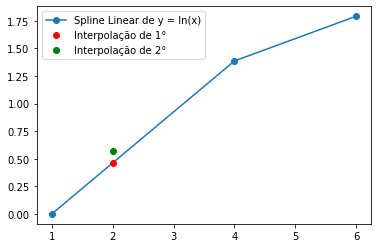

In [8]:
# Solução

X = [1, 4, 6]
Y = [0, 1.386294, 1.791759]

# (i) Polinômio de Primeiro Grau
y1 = int_lagrange(X[0:2],Y[0:2],2)
print("(i)\nA estimativa de ln(2) para o polinômio de primeiro grau é:", y1)

# (i) Polinômio de Segundo Grau
y2 = int_lagrange(X,Y,2)
print("\n(ii)\nA estimativa de ln(2) para o polinômio de segundo grau é:", y2)

plt.plot(X,Y, 'o-')
plt.plot(2,y1, 'or', 2,y2, 'og')
plt.legend(['Spline Linear de y = ln(x)', 'Interpolação de 1°', 'Interpolação de 2°']);

### Questão 8

Faça uma estimativa de $log(10)$ usando interpolação linear

(i) entre $log(8) = 0.9030900$ e $log(12) = 1.0791812$

(ii) entre $log(9) = 0.9542425$ e $log(11) = 1.0413927$

(i)
A estimativa de ln(10) é: 0.9911356000000002

(ii)
A estimativa de ln(10) é: 0.9978176


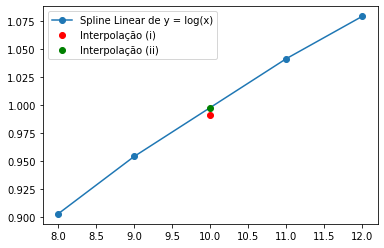

In [9]:
# Solução

# (i)
X = [8, 12]
Y = [0.9030900, 1.0791812]

y1 = int_lagrange(X,Y,10)
print("(i)\nA estimativa de ln(10) é:", y1)

# (i)
X = [9, 11]
Y = [0.9542425, 1.0413927]

y2 = int_lagrange(X,Y,10)
print("\n(ii)\nA estimativa de ln(10) é:", y2)

X = [8, 9, 11, 12]
Y = [0.9030900, 0.9542425, 1.0413927, 1.0791812]

plt.plot(X,Y, 'o-')
plt.plot(10,y1, 'or', 10,y2, 'og')
plt.legend(['Spline Linear de y = log(x)', 'Interpolação (i)', 'Interpolação (ii)']);

### Questão 9

Considere os dados e faça o que se pede:

x | y
-|-
1 | 3
2 | 6
3 | 19
5 | 99
7 | 291
8 | 444

(i) Calcule f(4) usando polinomios interpoladores de Lagrange de primeiro a terceiro graus.

(ii) Calcule f(4) usando polinomios interpoladores de Newton de primeiro a quarto graus.

(i)
A estimativa de f(4) de primeiro grau é: 59.0
A estimativa de f(4) de segundo grau é: 50.0
A estimativa de f(4) de terceiro grau é: 48.0

(ii)
A estimativa de f(4) de primeiro grau é: 59.0
A estimativa de f(4) de segundo grau é: 50.0
A estimativa de f(4) de terceiro grau é: 48.0
A estimativa de f(4) de quarto grau é: 48.0


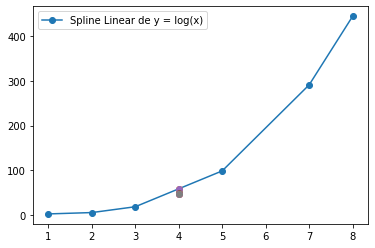

In [10]:
# Solução

X = np.array([1, 2, 3, 5, 7, 8])
Y = np.array([3, 6, 19, 99, 291, 444])

# (i)
y1 = int_lagrange(X[2:4],Y[2:4],4)
print("(i)\nA estimativa de f(4) de primeiro grau é:", y1)
y2 = int_lagrange(X[1:4],Y[1:4],4)
print("A estimativa de f(4) de segundo grau é:", y2)
y3 = int_lagrange(X[:4],Y[:4],4)
print("A estimativa de f(4) de terceiro grau é:", y3)

# (i)
y4 = int_newton(X[2:4],Y[2:4],4)
print("\n(ii)\nA estimativa de f(4) de primeiro grau é:", y4)
y5 = int_newton(X[1:4],Y[1:4],4)
print("A estimativa de f(4) de segundo grau é:", y5)
y6 = int_newton(X[:4],Y[:4],4)
print("A estimativa de f(4) de terceiro grau é:", y6)
y7 = int_newton(X[:-1],Y[:-1],4)
print("A estimativa de f(4) de quarto grau é:", y7)

plt.plot(X,Y, 'o-')
plt.plot(4,y1, 'o', 4,y2, 'o', 4,y3, 'o', 4,y4, 'o', 4,y5, 'o', 4,y6, 'o', 4,y7, 'o')
plt.legend(['Spline Linear de y = log(x)']);

### Questão 10

Conhecendo a seguinte tabela

x | f(x)
-|-
-1 | 15
0 | 8
3 | -1

determine:

(i) O polinômio de interpolação para a função definida por este conjunto de pares de pontos. Ou seja, determine a solução do sistema

$$ Xa = f $$

para o vetor de $a$ dos coeficientes de $P_2(x)$.

(ii) O polinomio de interpolação na forma de Newton.

In [11]:
# Solução

X = np.array([-1, 0, 3])
Y = np.array([15, 8, -1])

n = len(X)
x = sy.symbols("x")
    
dx = []
f = []
aux = np.diff(Y)

for i in range(1,n):
    dx.append(X[i:] - X[:-i])
    f.append(aux/dx[i-1])
    aux = np.diff(f[i-1])
    
b = []
    
for i in f:
    b.append(i[0])
    
f = Y[0]
aux = 1

for i in range(n-1):
    aux *= x - X[i]
    f += b[i]*aux

print("O polinômio é: P(x) =", sy.simplify(f))

O polinômio é: P(x) = 1.0*x**2 - 6.0*x + 8.0


### Questão 11

Usando os dados da tabela do exercício anterior:

(i) Determine $P_2(x)$ pela forma de Lagrange.

(ii) Calcule uma aproximação para $f(1)$ usando o item (i).

(i)
P(x) = x**2 - 6*x + 8

(ii)
A aproximação para f(1) é: 3.0


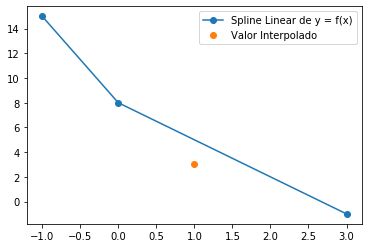

In [12]:
# Solução

X = [-1, 0, 3]
Y = [15, 8, -1]

# (i)
n = len(X)
x = sy.symbols("x")
f = 0
    
for i in range(n):
    L = 1
    for j in range(n):
        if (i != j):
            L *= (x - X[j])/(X[i] - X[j])
    f += L*Y[i]

print("(i)\nP(x) =", sy.simplify(f))

# (ii)
y = f.subs(x,1)

print("\n(ii)\nA aproximação para f(1) é:", float(y))

plt.plot(X,Y, 'o-')
plt.plot(1,y, 'o')
plt.legend(['Spline Linear de y = f(x)', 'Valor Interpolado']);

### Questão 12

Dada a tabela:

$x$ | $x e^{3x}$
-|-
0 | 1
0.1 | 1.3499
0.2 | 1.8221
0.3 | 2.4596
0.4 | 3.3201
0.5 | 4.4817

calcule $f(0.25)$, onde $f(x) = x e^{3x}$ usando polinômio de interpolação do 2° grau:

(i) Usando $x_0 = 0.2, x_1 = 0.3, x_2 = 0.4$;

(ii) Usando $x_0 = 0.1, x_1 = 0.2, x_2 = 0.3$;

(i)
A estimativa de f(0.25) é: 2.112975

(ii)
A estimativa de f(0.25) é: 2.1201875


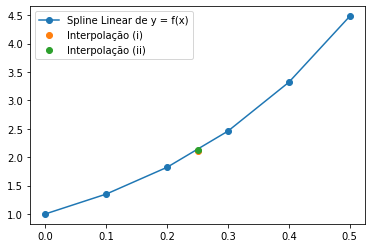

In [13]:
# Solução

# (i)
X = [0.2, 0.3, 0.4]
Y = [1.8221, 2.4596, 3.3201]

y1 = int_lagrange(X,Y,0.25)
print("(i)\nA estimativa de f(0.25) é:", y1)

# (i)
X = [0.1, 0.2, 0.3]
Y = [1.3499, 1.8221, 2.4596]

y2 = int_lagrange(X,Y,0.25)
print("\n(ii)\nA estimativa de f(0.25) é:", y2)

X = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
Y = [1, 1.3499, 1.8221, 2.4596, 3.3201, 4.4817]

plt.plot(X,Y, 'o-')
plt.plot(0.25,y1, 'o', 0.25,y2, 'o')
plt.legend(['Spline Linear de y = f(x)', 'Interpolação (i)', 'Interpolação (ii)']);

### Questão 13

Para a seguinte função tabelada 

$x$ | $x e^{3x}$
-|-
0 | 1
0.1 | 1.3499
0.2 | 1.8221
0.3 | 2.4596
0.4 | 3.3201
0.5 | 4.4817

construir a tabela de diferenças divididas.

In [14]:
# Solução

X = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
Y = np.array([1, 1.3499, 1.8221, 2.4596, 3.3201, 4.4817])

n = len(X)
x = sy.symbols("x")
    
dx = []
f = []
aux = np.diff(Y)

for i in range(1,n):
    dx.append(X[i:] - X[:-i])
    f.append(aux/dx[i-1])
    aux = np.diff(f[i-1])

for i in range(len(f)):
    print("\n As", i+1, "ªs diferenças divididas são:\n", f[i])


 As 1 ªs diferenças divididas são:
 [ 3.499  4.722  6.375  8.605 11.616]

 As 2 ªs diferenças divididas são:
 [ 6.115  8.265 11.15  15.055]

 As 3 ªs diferenças divididas são:
 [ 7.16666667  9.61666667 13.01666667]

 As 4 ªs diferenças divididas são:
 [6.125 8.5  ]

 As 5 ªs diferenças divididas são:
 [4.75]
